# Information Retrieval

In [1]:
import ParserCACM
import TextRepresenter
import indexation
import modeles
from query import QueryParserCACM
import evaluation
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import operator

""" Some info to remember when testing:
- Query 10 is about parallel computation
- Doc 46 is about parallelism too
"""

# Constants:
srcFolder = "cacm"
srcFile = "cacm.txt"
qryFile = "cacm.qry"
relFile = "cacm.rel"
gendata = "gendata"
indexName = "cacm"
docId = 46
queryId = np.random.randint(1,60)
wordTest = "logic"

cacm_txt = os.path.join(srcFolder, srcFile)
cacm_qry = os.path.join(srcFolder, qryFile)
cacm_rel = os.path.join(srcFolder, relFile)

## Testing the indexation:

In [2]:
# Construct the index:
idx = indexation.Index(indexName, gendata)
stemmer = TextRepresenter.PorterStemmer()
idx.indexation(cacm_txt, ParserCACM.ParserCACM(),
               stemmer)

Performing the indexation...
1st pass: build the index...
2nd pass: build the inverted index...
Finished.


In [3]:
print("\n###### Testing the index: ###### ")
print("Retrieve common stems in doc %d:" % docId)
stems = sorted(idx.getTfsForDoc(docId).items(), key=operator.itemgetter(1), reverse=True)
print([stem for stem, freq in stems[:10]])
print("""Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”""")

print("\nRetrieve docs that contains 'logic'")
docs = idx.getTfsForStem("logic") 
print("Should include doc 63 and 46:", (63 in docs.keys() and 46 in docs.keys()))


###### Testing the index: ###### 
Retrieve common stems in doc 46:
['program', 'ar', 'programm', 'problem', 'logic', 'requir', 'parallel', 'stretch', 'concurr', 'feasibl']
Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”

Retrieve docs that contains 'logic'
Should include doc 63 and 46: True


## Testing the weighters:

In [4]:
print("\n###### Testing BinaryWeighter: ###### ")
bw = modeles.BinaryWeighter(idx)
print("bw.getDocWeightsForDoc(",docId,"):", 
    bw.getDocWeightsForDoc(docId))
print("\nbw.getDocWeightsForStem('"+wordTest+"'):", 
    bw.getDocWeightsForStem(wordTest))
query = stemmer.getTextRepresentation(" Parallel languages; languages for parallel computation")
print("\nbw.getWeightsForQuery(' Parallel languages; languages for parallel computation'):", 
    bw.getWeightsForQuery(query))

print("\n###### Testing Vectoriel with BinaryWeighter: ###### ")
vect = modeles.Vectoriel(idx, bw)
print("Top 10 documents for the previous query:")
print(vect.getRanking(query)[:10])


###### Testing BinaryWeighter: ###### 
bw.getDocWeightsForDoc( 46 ): {'concurr': 1, 'feasibl': 1, 'consider': 1, 'design': 1, 'present': 1, 'tendenc': 1, 'increas': 1, 'ar': 3, 'logic': 2, 'carefulli': 1, 'balanc': 1, 'combin': 1, 'supervisori': 1, 'mcdonough': 1, 'requir': 2, 'parallel': 2, 'discuss': 1, 'exploit': 1, 'program': 4, 'scalzi': 1, 'thi': 1, 'programm': 3, 'problem': 3, 'sever': 1, 'multiprogramm': 1, 'execut': 1, 'describ': 1, 'minimum': 1, 'codd': 1, 'place': 1, 'independ': 1, 'stretch': 2, 'comput': 1, 'number': 1, 'built': 1, 'note': 1, 'burden': 1, 'lowri': 1, 'met': 1, 'machin': 1, 'techniqu': 1, 'compil': 1, 'success': 1}

bw.getDocWeightsForStem('logic'): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 2, 

In [5]:

print("\n###### Testing TfidfWeighter: ###### ")
tfidfWeighter = modeles.TfidfWeighter(idx)
print("tfidfWeighter.getDocWeightsForDoc(", docId, "):",
    tfidfWeighter.getDocWeightsForDoc(docId))
print("\ntfidfWeighter.getDocWeightsForStem(\"logic\"):",
    tfidfWeighter.getDocWeightsForStem(wordTest))
print("\ntfidfWeighter.getWeightsForQuery(query):",
    tfidfWeighter.getWeightsForQuery(query))

print("\n###### Testing Vectoriel with TfidfWeighter: ###### ")
vect = modeles.Vectoriel(idx, tfidfWeighter)
print("Top 10 documents for the query:")
print(vect.getRanking(query)[:10])



###### Testing TfidfWeighter: ###### 
tfidfWeighter.getDocWeightsForDoc( 46 ): {'concurr': 1, 'feasibl': 1, 'consider': 1, 'design': 1, 'present': 1, 'tendenc': 1, 'increas': 1, 'ar': 3, 'logic': 2, 'carefulli': 1, 'balanc': 1, 'combin': 1, 'supervisori': 1, 'mcdonough': 1, 'requir': 2, 'parallel': 2, 'discuss': 1, 'exploit': 1, 'program': 4, 'scalzi': 1, 'thi': 1, 'programm': 3, 'problem': 3, 'sever': 1, 'multiprogramm': 1, 'execut': 1, 'describ': 1, 'minimum': 1, 'codd': 1, 'place': 1, 'independ': 1, 'stretch': 2, 'comput': 1, 'number': 1, 'built': 1, 'note': 1, 'burden': 1, 'lowri': 1, 'met': 1, 'machin': 1, 'techniqu': 1, 'compil': 1, 'success': 1}

tfidfWeighter.getDocWeightsForStem("logic"): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 

## Testing the QueryParser

In [6]:
print("\n###### Testing QueryParserCACM: ###### ")
qp = QueryParserCACM(cacm_qry, cacm_rel)
query = qp.nextQuery()
print("Searching for query #%d:" % queryId)
while query is not None and query.getID() != str(queryId):
    print(query)
    print(20*'-')
    query = qp.nextQuery()
    
print("Query:", query)
queryTxt = stemmer.getTextRepresentation(query.getText())
scores = vect.getRanking(queryTxt)
print("\nScores:", scores[:10])



###### Testing QueryParserCACM: ###### 
Searching for query #47:
Query {id=1, txt='What articles exist which deal with TSS (Time Sharing System), an
operating system for IBM computers?
', relevances=[2020, 1410, 1572, 1605, 2358]}
--------------------
Query {id=2, txt='I am interested in articles written either by Prieve or Udo Pooch
', relevances=[2434, 3078, 2863]}
--------------------
Query {id=3, txt='Intermediate languages used in construction of multi-targeted compilers; TCOLL
', relevances=[2290, 2923, 1947, 1613, 1134, 1807]}
--------------------
Query {id=4, txt='I'm interested in mechanisms for communicating between disjoint processes,
possibly, but not exclusively, in a distributed environment.  I would
rather see descriptions of complete mechanisms, with or without implementations,
as opposed to theoretical work on the abstract problem.  Remote procedure
calls and message-passing are examples of my interests.
', relevances=[2912, 3073, 2371, 2597, 3082, 2796, 2256, 1811, 1

## Testing measures:


###### Testing evaluation.PrecisionRecallMeasure: ###### 
Searching for query # [42 46 31 17 15]
Query: Query {id=15, txt='Find all discussions of horizontal microcode optimization with special
emphasis on optimization of loops and global optimization.
', relevances=[2701, 2880, 2685, 2495, 2598, 2263, 1947, 1613, 1231, 1551]}


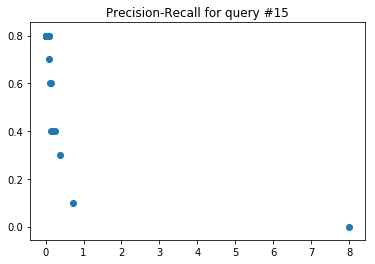

Query: Query {id=17, txt='Optimization of intermediate and machine code
', relevances=[2579, 1947, 1223, 1231, 2923, 2495, 1613, 1934, 1807, 1134, 2290, 115, 405, 2586, 1551, 1535]}


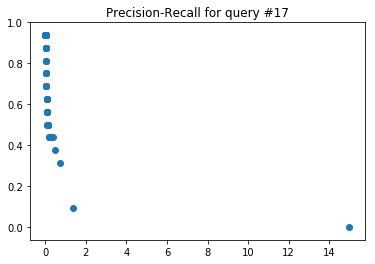

Query: Query {id=31, txt='I'd like to find articles describing the use of singular value decomposition
in digital image processing.  Applications include finding approximations
to the original image and restoring images that are subject to noise. An
article on the subject is H.C. Andrews and C.L. Patterson "Outer product
expansions and their uses in digital image processing", American Mathematical
Monthly, vol. 82.
', relevances=[2125, 3047]}


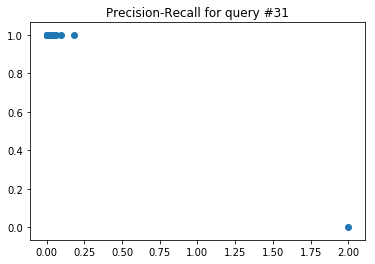

Query: Query {id=42, txt='Computer performance evaluation techniques using pattern recognition
and clustering.
', relevances=[3072, 1827, 1572, 2085, 2022, 2151, 2344, 2247, 3048, 1805, 1518, 1069, 2984, 2318, 2951, 1653, 2542, 2522, 1884, 2749]}


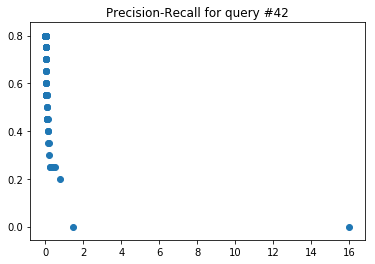

Query: Query {id=46, txt='The application of fuzzy subset theory to clustering and information
retrieval problems.  This includes performance evaluation and automatic
indexing considerations.
', relevances=[149]}


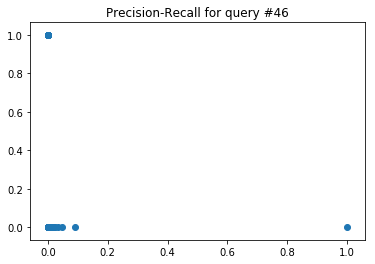

In [7]:
print("\n###### Testing evaluation.PrecisionRecallMeasure: ###### ")
queryChosen = np.random.randint(1, 50, size=5)
qp = QueryParserCACM(cacm_qry, cacm_rel)
query = qp.nextQuery()
print("Searching for query #",queryChosen)
while query is not None :
    if int(query.getID()) in queryChosen:
        print("Query:", query)
        queryTxt = stemmer.getTextRepresentation(query.getText())
        scores = vect.getRanking(queryTxt)
        irlist = evaluation.IRList(query, scores)
        precisRecall = evaluation.PrecisionRecallMeasure(irlist)
        pr = precisRecall.eval()
        plt.scatter(*zip(*pr))
        plt.title("Precision-Recall for query #"+query.getID())
        plt.show()
 
        
    query = qp.nextQuery()
    